# Cheminformatics basics - A SMARTS way to filter molecules 
> Walkthrough about what are SMARTS and SMIRKS, and how they can be used for substructure filtering 

- toc:true
- badges: true
- comments: true
- author: Pushkar G. Ghanekar
- categories: [chemical-science, python, data-analysis]

<a href="https://www.rdkit.org/"><img src="https://img.shields.io/static/v1?label=Powered%20by&message=RDKit&color=3838ff&style=flat&logo=" align="left"/></a><br>

The code in this notebook is inspired from: 
* [iwatobipen](https://iwatobipen.github.io/is_life_worth_living-/jupyter/2021/11/19/NIBR_SF.html)
* [PatWalters](http://practicalcheminformatics.blogspot.com/2018/08/filtering-chemical-libraries.html?utm_source=pocket_mylist)

## Pattern matching 

### In molecules 

**The SMART way** 

SMARTS (SMiles ARbitrary Target Specification) is a lanuguage used to search, select, and match a substructure pattern in a molecule SMILE. The idea of SMARTS is reminiscent of regular expressions (regex) for texts. Following some pre-defined rules for searching, SMARTS offer a powerful way to systematically search though a large corpus of molecules for a particular chemical phenotype. 

More details on the SMARTS and its 'grammar' can be found on the Daylight's [official page](http://www.daylight.com/dayhtml/doc/theory/theory.smarts.html)

Few words of caution: 
* SMILES represent _whole_ molecule (graph), SMARTS identify a substructure (subgraph). 
* All SMILES are valid SMARTS 
* It is better to be precise with your query than be general (you dont know what it might hit if not meticulous)
> For instance, the SMILES O means an aliphatic oxygen with zero charge and two hydrogens, i.e. water. In SMARTS, the same expression means any aliphatic oxygen regardless of charge, hydrogen count, etc, e.g. it will match the oxygen in water, but also those in ethanol, acetone, molecular oxygen, hydroxy and hydronium ions, etc. Specifying [OH2] limits the pattern to match only water (this is also the fully specified SMILES for water).

<table border="">
<caption><b>SMARTS Atomic Primitives</b></caption>

<tbody><tr>
  <th>Symbol</th>
  <th>Symbol name</th>
  <th>Atomic property requirements</th>
  <th>Default</th>
</tr>

<tr>
  <td>* </td>
  <td>wildcard</td>
  <td>any atom</td>
  <td>(no default)</td>
</tr>

<tr>
  <td>a</td>
  <td>aromatic</td>
  <td>aromatic</td>
  <td>(no default)</td>
</tr>

<tr>
  <td>A</td>
  <td>aliphatic</td>
  <td>aliphatic </td>
  <td>(no default)</td>
</tr>

<tr>
  <td>D&lt;n&gt;</td>
  <td>degree</td>
  <td>&lt;n&gt; explicit connections</td>
  <td>exactly one</td>
</tr>

<tr>
  <td>H&lt;n&gt;</td>
  <td>total-H-count</td>
  <td>&lt;n&gt; attached hydrogens</td>
  <td>exactly one<sup><small>1</small></sup></td>
</tr>

<tr>
  <td>h&lt;n&gt;</td>
  <td>implicit-H-count</td>
  <td>&lt;n&gt; implicit hydrogens</td>
  <td>at least one</td>
</tr>

<tr>
  <td>R&lt;n&gt;</td>
  <td>ring membership</td>
  <td>in &lt;n&gt; SSSR rings</td>
  <td>any ring atom</td>
</tr>

<tr>
  <td>r&lt;n&gt; </td>
  <td>ring size</td>
  <td>in smallest SSSR ring of size &lt;n&gt;</td>
  <td>any ring atom<sup><small>2</small></sup></td>
</tr>

<tr>
  <td>v&lt;n&gt;</td>
  <td>valence</td>
  <td>total bond order &lt;n&gt; </td>
  <td>exactly one<sup><small>2</small></sup></td>
</tr>

<tr>
  <td>X&lt;n&gt;</td>
  <td>connectivity</td>
  <td>&lt;n&gt; total connections</td>
  <td>exactly one<sup><small>2</small></sup></td>
</tr>

<tr>
  <td>x&lt;n&gt;</td>
  <td>ring connectivity</td>
  <td>&lt;n&gt; total ring connections</td>
  <td>at least one<sup><small>2</small></sup></td>
</tr>

<tr>
  <td>- &lt;n&gt;</td>
  <td>negative charge</td>
  <td>-&lt;n&gt; charge</td>
  <td>-1 charge (-- is -2, etc)</td>
</tr>

<tr>
  <td>+&lt;n&gt;</td>
  <td>positive charge</td>
  <td>+&lt;n&gt; formal charge</td>
  <td>+1 charge (++ is +2, etc)</td>
</tr>

<tr>
  <td>#n</td>
  <td>atomic number</td>
  <td>atomic number &lt;n&gt;</td>
  <td>(no default)<sup><small>2</small></sup></td>
</tr>

<tr>
  <td>@</td>
  <td>chirality</td>
  <td>anticlockwise</td>
  <td>anticlockwise, default class<sup><small>2</small></sup></td>
</tr>

<tr>
  <td>@@</td>
  <td>chirality</td>
  <td>clockwise</td>
  <td>clockwise, default class<sup><small>2</small></sup></td>
</tr>

<tr>
  <td>@&lt;c&gt;&lt;n&gt;</td>
  <td>chirality</td>
  <td>chiral class &lt;c&gt; chirality &lt;n&gt;</td>
  <td>(nodefault)</td>
</tr>

<tr>
  <td>@&lt;c&gt;&lt;n&gt;?</td>
  <td>chiral or unspec</td>
  <td>chirality &lt;c&gt;&lt;n&gt; or unspecified</td>
  <td>(no default)</td>

</tr><tr>
  <td>&lt;n&gt;</td>
  <td>atomic mass</td>
  <td>explicit atomic mass</td>
  <td>unspecified mass</td>
</tr>
</tbody></table>

<center>
    <b>Examples<sup><small>1</small></sup>:</b>
<table border="">
<tbody><tr>
  <td>C</td>
  <td>aliphatic carbon atom</td>
</tr>

<tr>
  <td>c</td>
  <td>aromatic carbon atom</td>
</tr>

<tr>
  <td>a</td>
  <td>aromatic atom</td>
</tr>

<tr>
  <td>[#6]</td>
  <td>carbon atom</td>
</tr>

<tr>
  <td>[Ca]</td>
  <td>calcium atom</td>
</tr>

<tr>
  <td>[++]</td>
  <td>atom with a +2 charge</td>
  <td>
</td></tr>

<tr>
  <td>[R]</td>
  <td>atom in any ring</td>
</tr>

<tr>
  <td>[D3]</td>
  <td>atom with 3 explicit bonds (implicit H's don't count)</td>
</tr>

<tr>
  <td>[X3]</td>
  <td>atom with 3 total bonds (includes implicit H's)</td>
</tr>

<tr>
  <td>[v3]</td>
  <td>atom with bond orders totaling 3 (includes implicit H's)</td>
</tr>

<tr>
  <td>C[C@H](F)O</td>
  <td>match chirality (H-F-O anticlockwise viewed from C)</td>
</tr>

<tr>
  <td>C[C@?H](F)O</td>
  <td>matches if chirality is as specified or is not specified</td>
</tr>
</tbody></table>
    </center>

<center>
<table border="">
<tbody><tr>
  <td>cc</td>
  <td>any pair of attached aromatic carbons</td>
</tr>

<tr>
  <td>c:c</td>
  <td>aromatic carbons joined by an aromatic bond</td>
</tr>

<tr>
  <td>c-c</td>
  <td>aromatic carbons joined by a single bond (e.g. biphenyl).</td>
</tr>

<tr>
  <td>O</td>
  <td>any aliphatic oxygen</td>
</tr>

<tr>
  <td>[O;H1]</td>
  <td>simple hydroxy oxygen</td>
</tr>

<tr>
  <td>[O;D1]</td>
  <td>1-connected (hydroxy or hydroxide) oxygen</td>
</tr>

<tr>
  <td>[O;D2]</td>
  <td>2-connected (etheric) oxygen</td>
</tr>

<tr>
  <td>[C,c]</td>
  <td>any carbon</td>
</tr>

<tr>
  <td>F,Cl,Br,I]</td>
  <td>the 1st four halogens.</td>
</tr>

<tr>
  <td>[N;R]</td>
  <td>must be aliphatic nitrogen AND in a ring</td>
</tr>

<tr>
  <td>[!C;R]</td>
  <td>( NOTaliphatic carbon ) AND in a ring</td>
</tr>

<tr>
  <td>[n;H1]</td>
  <td>H-pyrrole nitrogen</td>
</tr>

<tr>
  <td>[n&amp;H1]</td>
  <td>same as above</td>
</tr>

<tr>
  <td>[c,n&amp;H1]</td>
  <td>any arom carbon OR H-pyrrole nitrogen</td>
</tr>

<tr>
  <td>[c,n;H1]</td>
  <td>(arom carbon OR arom nitrogen) and exactly one H</td>
</tr>

<tr>
  <td>*!@*</td>
  <td>two atoms connected by a non-ringbond</td>
</tr>

<tr>
  <td>*@;!:*</td>
  <td>two atoms connected by a non-aromatic ringbond</td>
</tr>

<tr>
  <td>[C,c]=,#[C,c]</td>
  <td>two carbons connected by a double or triple bond</td>
</tr>

</tbody></table>
</center>



**Query files**

[Greg Landrum of Rdkit on query files](https://greglandrum.github.io/rdkit-blog/tutorial/substructure/2021/08/03/generalized-substructure-search.html)

**Pre-defined filters**

### In chemical reactions 

**The Reaction SMARTS way** 

**SMIRKS**

<center>
<table border="1">
  <tbody><tr>
    <td colspan="4" align="center">
    <b>Example Reaction SMARTS:</b>
    </td></tr><tr>
      <td align="center">Query:</td>
      <td align="center">Target:</td>
      <td align="center">Matches:</td>
      <td align="center">Comment:</td>
    </tr>
    <tr>
      <td align="center">C&gt;&gt;C</td>
      <td align="center">CC&gt;&gt;CC</td>
      <td align="center">4</td>
      <td>No maps, normal match.</td>
    </tr>	  
    <tr>
      <td align="center">C&gt;&gt;C</td>
      <td align="center">[CH3:7][CH3:8]&gt;&gt; [CH3:7][CH3:8]</td>
      <td align="center">4</td>
      <td>No maps in query, maps in target are ignored.</td>
    </tr>
    <tr>
      <td align="center">[C:1]&gt;&gt;C</td>
      <td align="center">[CH3:7][CH3:8]&gt;&gt; [CH3:7][CH3:8]</td>
      <td align="center">4</td>
      <td>Unpaired map in query ignored.</td>
    </tr>
    <tr>
      <td align="center">[C:1]&gt;&gt;[C:1]</td>
      <td align="center">CC&gt;&gt;CC</td>
      <td align="center">0</td>
      <td>No maps in target, hence no matches.</td>
    </tr>
    <tr>
      <td align="center">[C:?1]&gt;&gt;[C:?1]</td>
      <td align="center">CC&gt;&gt;CC</td>
      <td align="center">4</td>
      <td>Query says mapped as shown or not present.</td>
    </tr>
    <tr>
      <td align="center">[C:1]&gt;&gt;[C:1]</td>
      <td align="center">[CH3:7][CH3:8]&gt;&gt;[CH3:7][CH3:8]</td>
      <td align="center">2</td>
      <td>Matches for target 7,7 and 8,8 atom pairs.</td>
    </tr>
    <tr>
      <td align="center">[C:1]&gt;&gt;[C:2]</td>
      <td align="center">[CH3:7][CH3:8]&gt;&gt; [CH3:7][CH3:8]</td>
      <td align="center">4</td>
      <td>When a query class is not found on both<br>sides of the query, it is
	  ignored;<br>this query does NOT say that the atoms<br>are in different
	  classes. </td>
    </tr>
    <tr>
      <td align="center">[C:1][C:1]&gt;&gt;[C:1]</td>
      <td align="center">[CH3:7][CH3:7]&gt;&gt; [CH3:7][CH3:7]</td>
      <td align="center">4</td>
      <td>Atom maps match with "or" logic.  All atoms<br>get bound to
	  class 7.</td>
    </tr>
    <tr>
      <td align="center">[C:1][C:1]&gt;&gt;[C:1]</td>
      <td align="center">[CH3:7][CH3:8]&gt;&gt; [CH3:7][CH3:8]</td>
      <td align="center">4</td>
      <td>The reactant atoms are bound to classes 7<br>and 8. Note that having
	  the first query atom<br>bound to class 7 does not preclude<br>binding the
	  second atom. Next, the product<br>atom can bind to classes 7 or 8.</td>
    </tr>
    <tr>
      <td align="center">[C:1][C:1]&gt;&gt;[C:1]</td>
      <td align="center">[CH3:7][CH3:7]&gt;&gt; [CH3:7][CH3:8]</td>
      <td align="center">2</td>
      <td>The reactants are bound to class 7.  The<br>product atom can bind to
	  class 7 only.</td>
    </tr>
  
 
</tbody></table>
</center>

### Other resources:

* [Daylight SMART Examples](https://daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html#ES_AM)
* [SMARTS.plus - to visualize the smart strings](https://smarts.plus/) 

**Relevant literature** 

1. [Rules for Identifying Potentially Reactive or Promiscuous Compounds | Journal of Medicinal Chemistry (acs.org)](https://pubs.acs.org/doi/abs/10.1021/jm301008n)

2. [Baell, J. B.; Holloway, G. A. New Substructure Filters for Removal of Pan Assay Interference Compounds (PAINS) from Screening Libraries and for Their Exclusion in Bioassays. J. Med. Chem. 2010.](https://doi.org/10.1021/jm901137j)

3. [Vidler, L. R.; Watson, I. A.; Margolis, B. J.; Cummins, D. J.; Brunavs, M. Investigating the Behavior of Published PAINS Alerts Using a Pharmaceutical Company Dataset. ACS Med. Chem. Lett. 2018.](https://doi.org/10.1021/acsmedchemlett.8b00097.)

4. [Schuffenhauer, A. et al. Evolution of Novartis' small molecule screening deck design, J. Med. Chem. (2020)](https://pubs.acs.org/doi/10.1021/acs.jmedchem.0c01332)

5. [Gomez-Sanchez, Ruben et al. “Maintaining a High-Quality Screening Collection: The GSK Experience.” SLAS discovery : advancing life sciences R & D vol. 26,8 (2021): 1065-1070. doi:10.1177/24725552211017526](https://pubmed.ncbi.nlm.nih.gov/34142592/)

## Install necessary modules 

In [5]:
# collapse_output
# Install requirements for the tutorial
# !pip install pandas rdkit-pypi mols2grid matplotlib scikit-learn ipywidgets

In [6]:
import os 
import pandas as pd
import numpy as np 

The majority of the basic molecular functionality is found in module `rdkit.Chem`

In [1]:
# RDkit imports
import rdkit
from rdkit import Chem #This gives us most of RDkits's functionality
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
IPythonConsole.ipython_useSVG=True  #SVG's tend to look nicer than the png counterparts
print(rdkit.__version__)

# Mute all errors except critical
Chem.WrapLogs()
lg = rdkit.RDLogger.logger() 
lg.setLevel(rdkit.RDLogger.CRITICAL)

2021.09.3


In [2]:
from collections import defaultdict
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [3]:
#----- PLOTTING PARAMS ----# 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# High DPI rendering for mac
%config InlineBackend.figure_format = 'retina'

# Plot matplotlib plots with white background: 
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plot_params = {
'font.size' : 15,
'axes.titlesize' : 15,
'axes.labelsize' : 15,
'axes.labelweight' : 'bold',
'xtick.labelsize' : 12,
'ytick.labelsize' : 12,
}
 
plt.rcParams.update(plot_params)

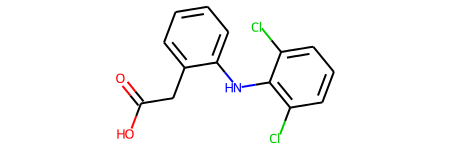

In [4]:
diclofenac = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
diclofenac

In [5]:
# Code from : https://www.rdkit.org/docs/GettingStartedInPython.html?highlight=maccs#drawing-molecules
sub_pattern = Chem.MolFromSmarts('O=CCccN')
hit_ats = list(diclofenac.GetSubstructMatch(sub_pattern))
hit_bonds = []

for bond in sub_pattern.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    
    hit_bonds.append( diclofenac.GetBondBetweenAtoms(aid1, aid2).GetIdx() )

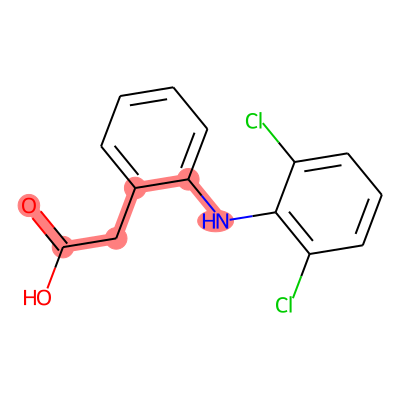

In [6]:
d2d = rdMolDraw2D.MolDraw2DSVG(400, 400) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d2d, diclofenac, highlightAtoms=hit_ats,  highlightBonds=hit_bonds)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

Defining a function to make it easy and reproducible: 

In [7]:
def viz_substruct(main_smile, substructure_smarts):
    
    mol_file = Chem.MolFromSmiles(main_smile)
    sub_pattern = Chem.MolFromSmarts(substructure_smarts)
    
    hit_ats = list(mol_file.GetSubstructMatch(sub_pattern)) # Returns the indices of the molecule’s atoms that match a substructure query
    hit_bonds = []

    for bond in sub_pattern.GetBonds():
        aid1 = hit_ats[bond.GetBeginAtomIdx()]
        aid2 = hit_ats[bond.GetEndAtomIdx()]

        hit_bonds.append( mol_file.GetBondBetweenAtoms(aid1, aid2).GetIdx() )

    d2d = rdMolDraw2D.MolDraw2DSVG(400, 400) # or MolDraw2DCairo to get PNGs
    rdMolDraw2D.PrepareAndDrawMolecule(d2d, mol_file, highlightAtoms=hit_ats,  highlightBonds=hit_bonds)
    d2d.FinishDrawing()
    return SVG(d2d.GetDrawingText())

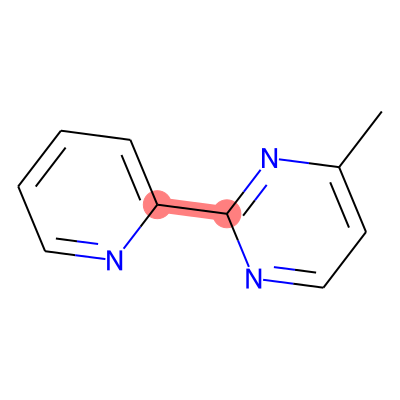

In [9]:
viz_substruct('C1=NC(=NC(=C1)C)C2=CC=CC=N2','[ar]!@[ar]')

### Online resource to visualize the SMARTS. 

This code is inspired from Pen Taka's [blogpost](https://iwatobipen.wordpress.com/2022/02/14/easy-way-to-visualize-smarts-chemoinformatics-memo/)

[SMARTS.plus](https://smarts.plus/) is a nice web GUI to visualize different SMART queries real-time. 

In [22]:
from rdkit import Chem
from IPython.display import Image
import requests
import urllib
from time import time 

In [11]:
baseurl = "https://smarts.plus/smartsview/download_rest?"

In [31]:
# Function to get a request for SMART query
def get_img(query):
    url = baseurl+query
    start = time()
    res = requests.get(url)
    _img = Image(res.content, embed=True, retina=True)
    print('Time taken: {0:0.2f} secs'.format(time() - start))
    return _img

Time taken: 2.16 secs


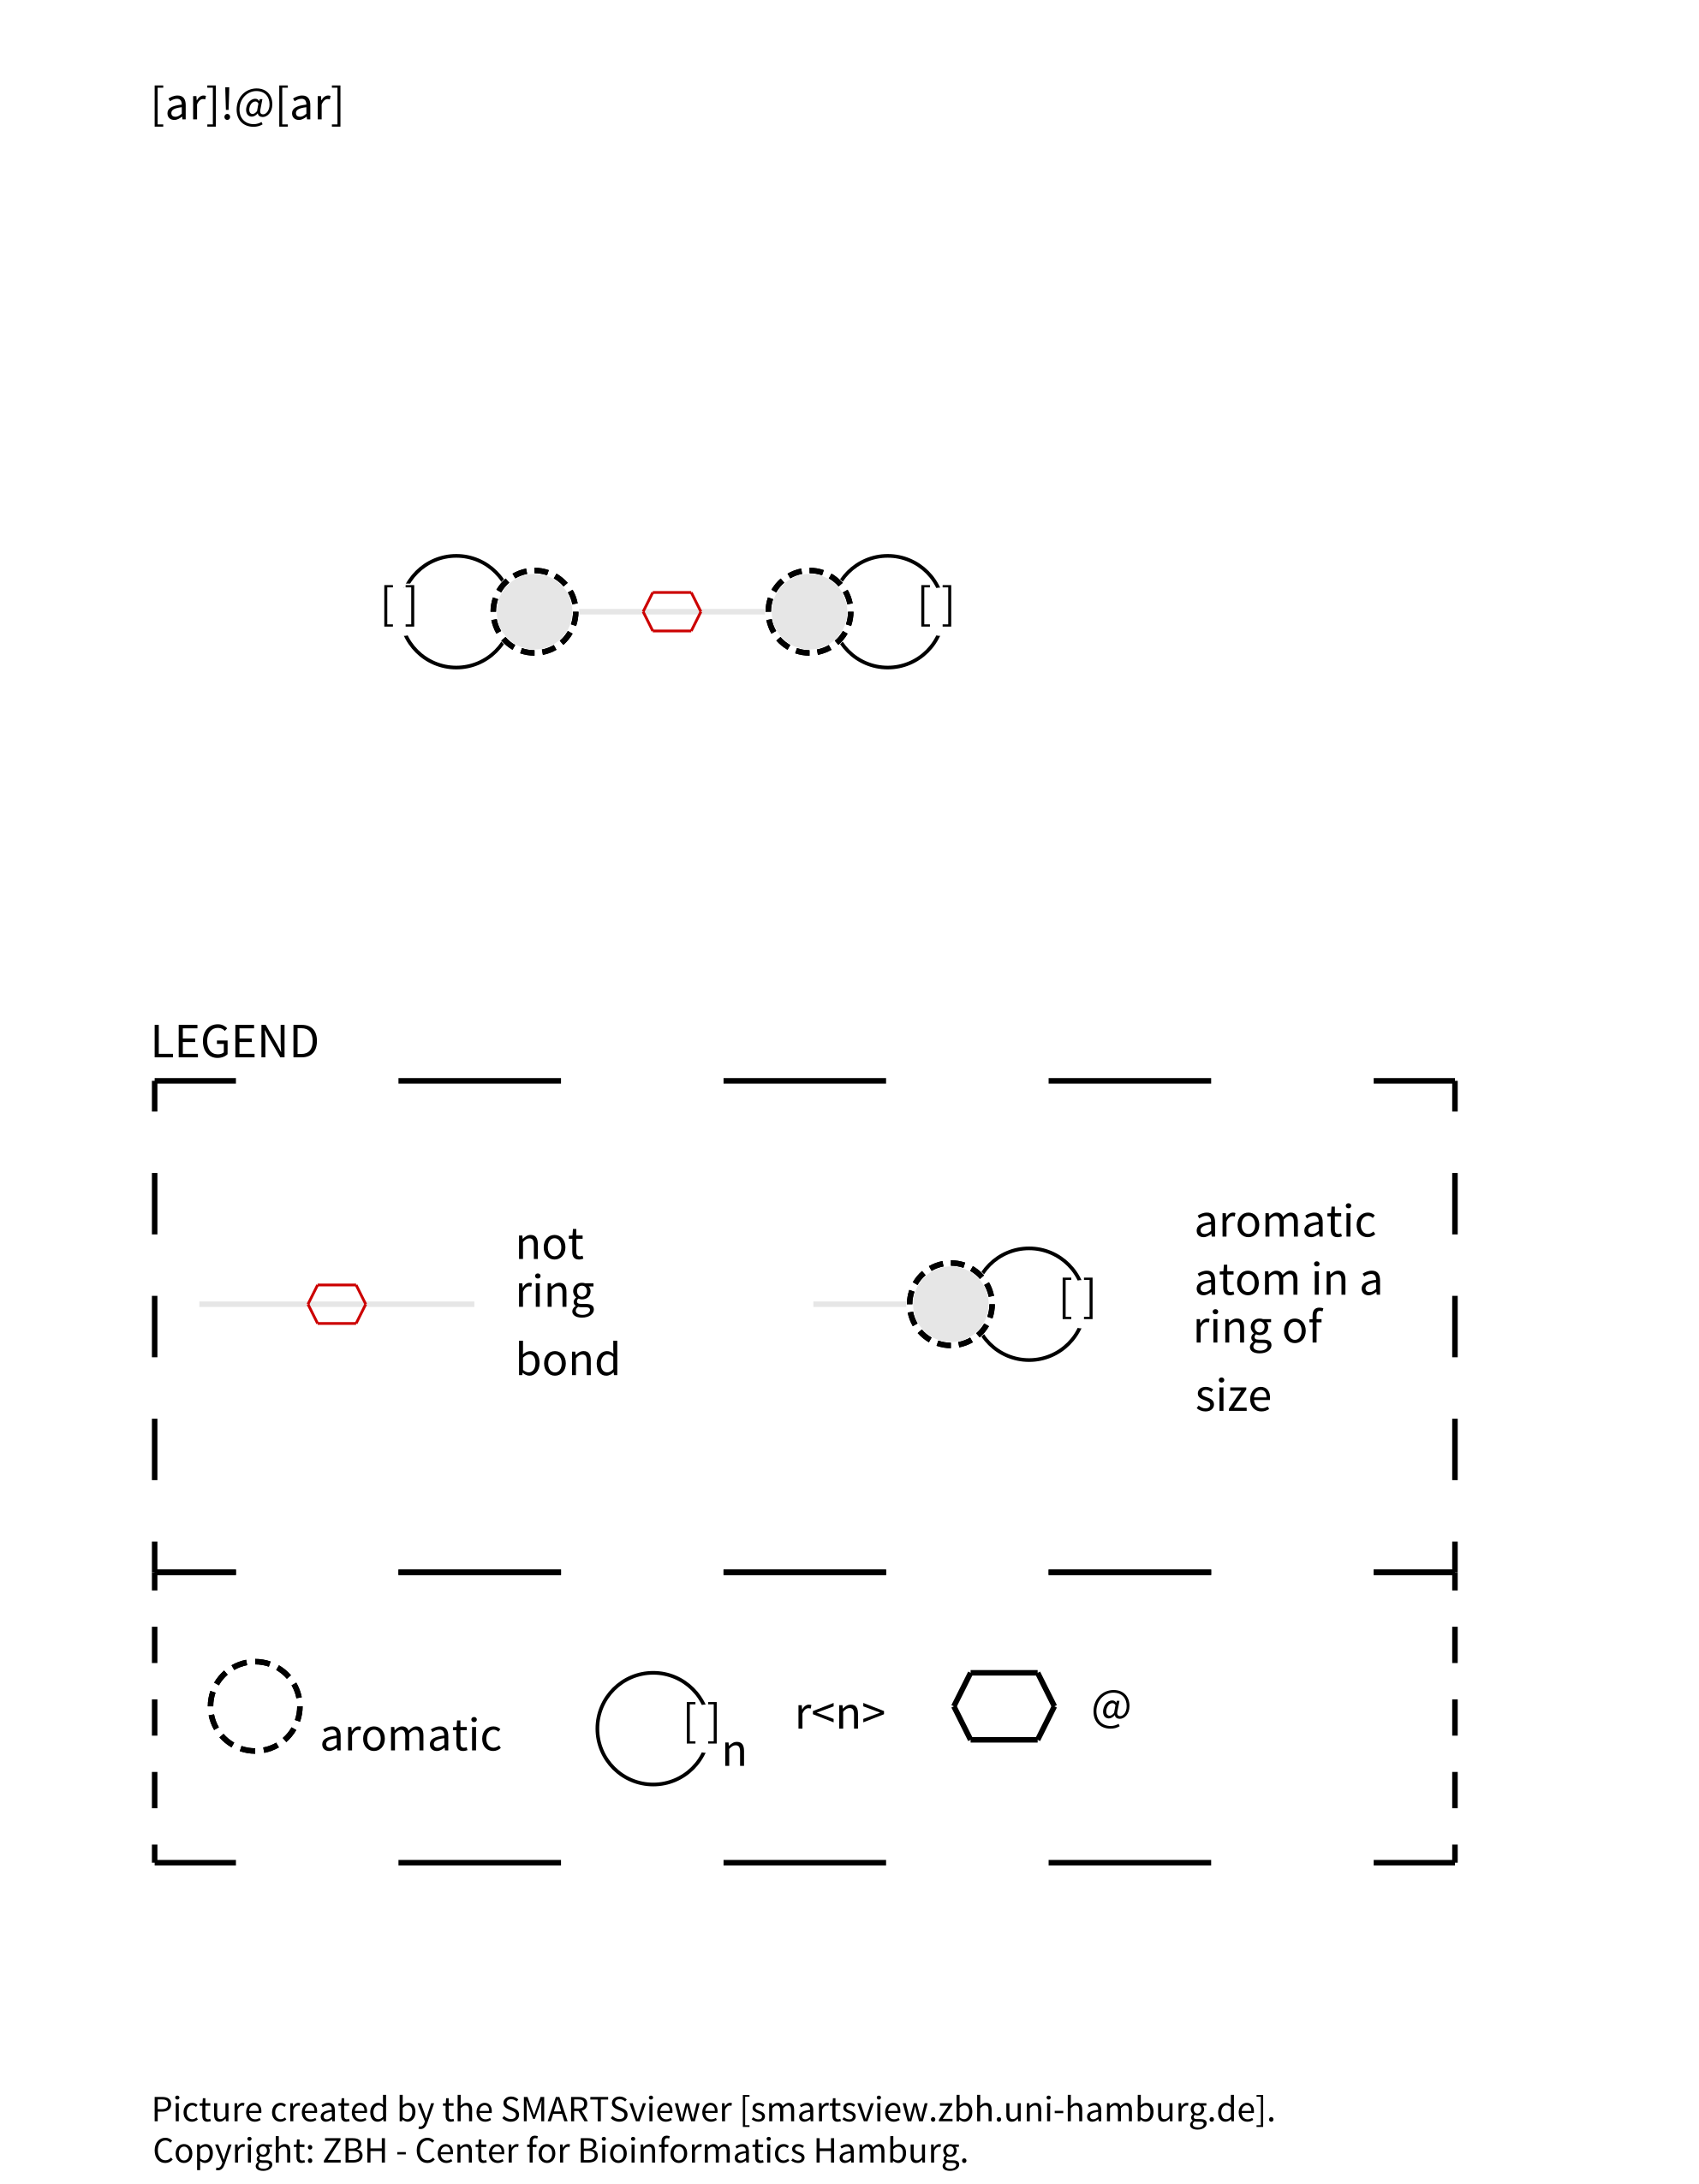

In [32]:
im0 = get_img("smarts=[ar]!@[ar]")
im0

Time taken: 2.00 secs


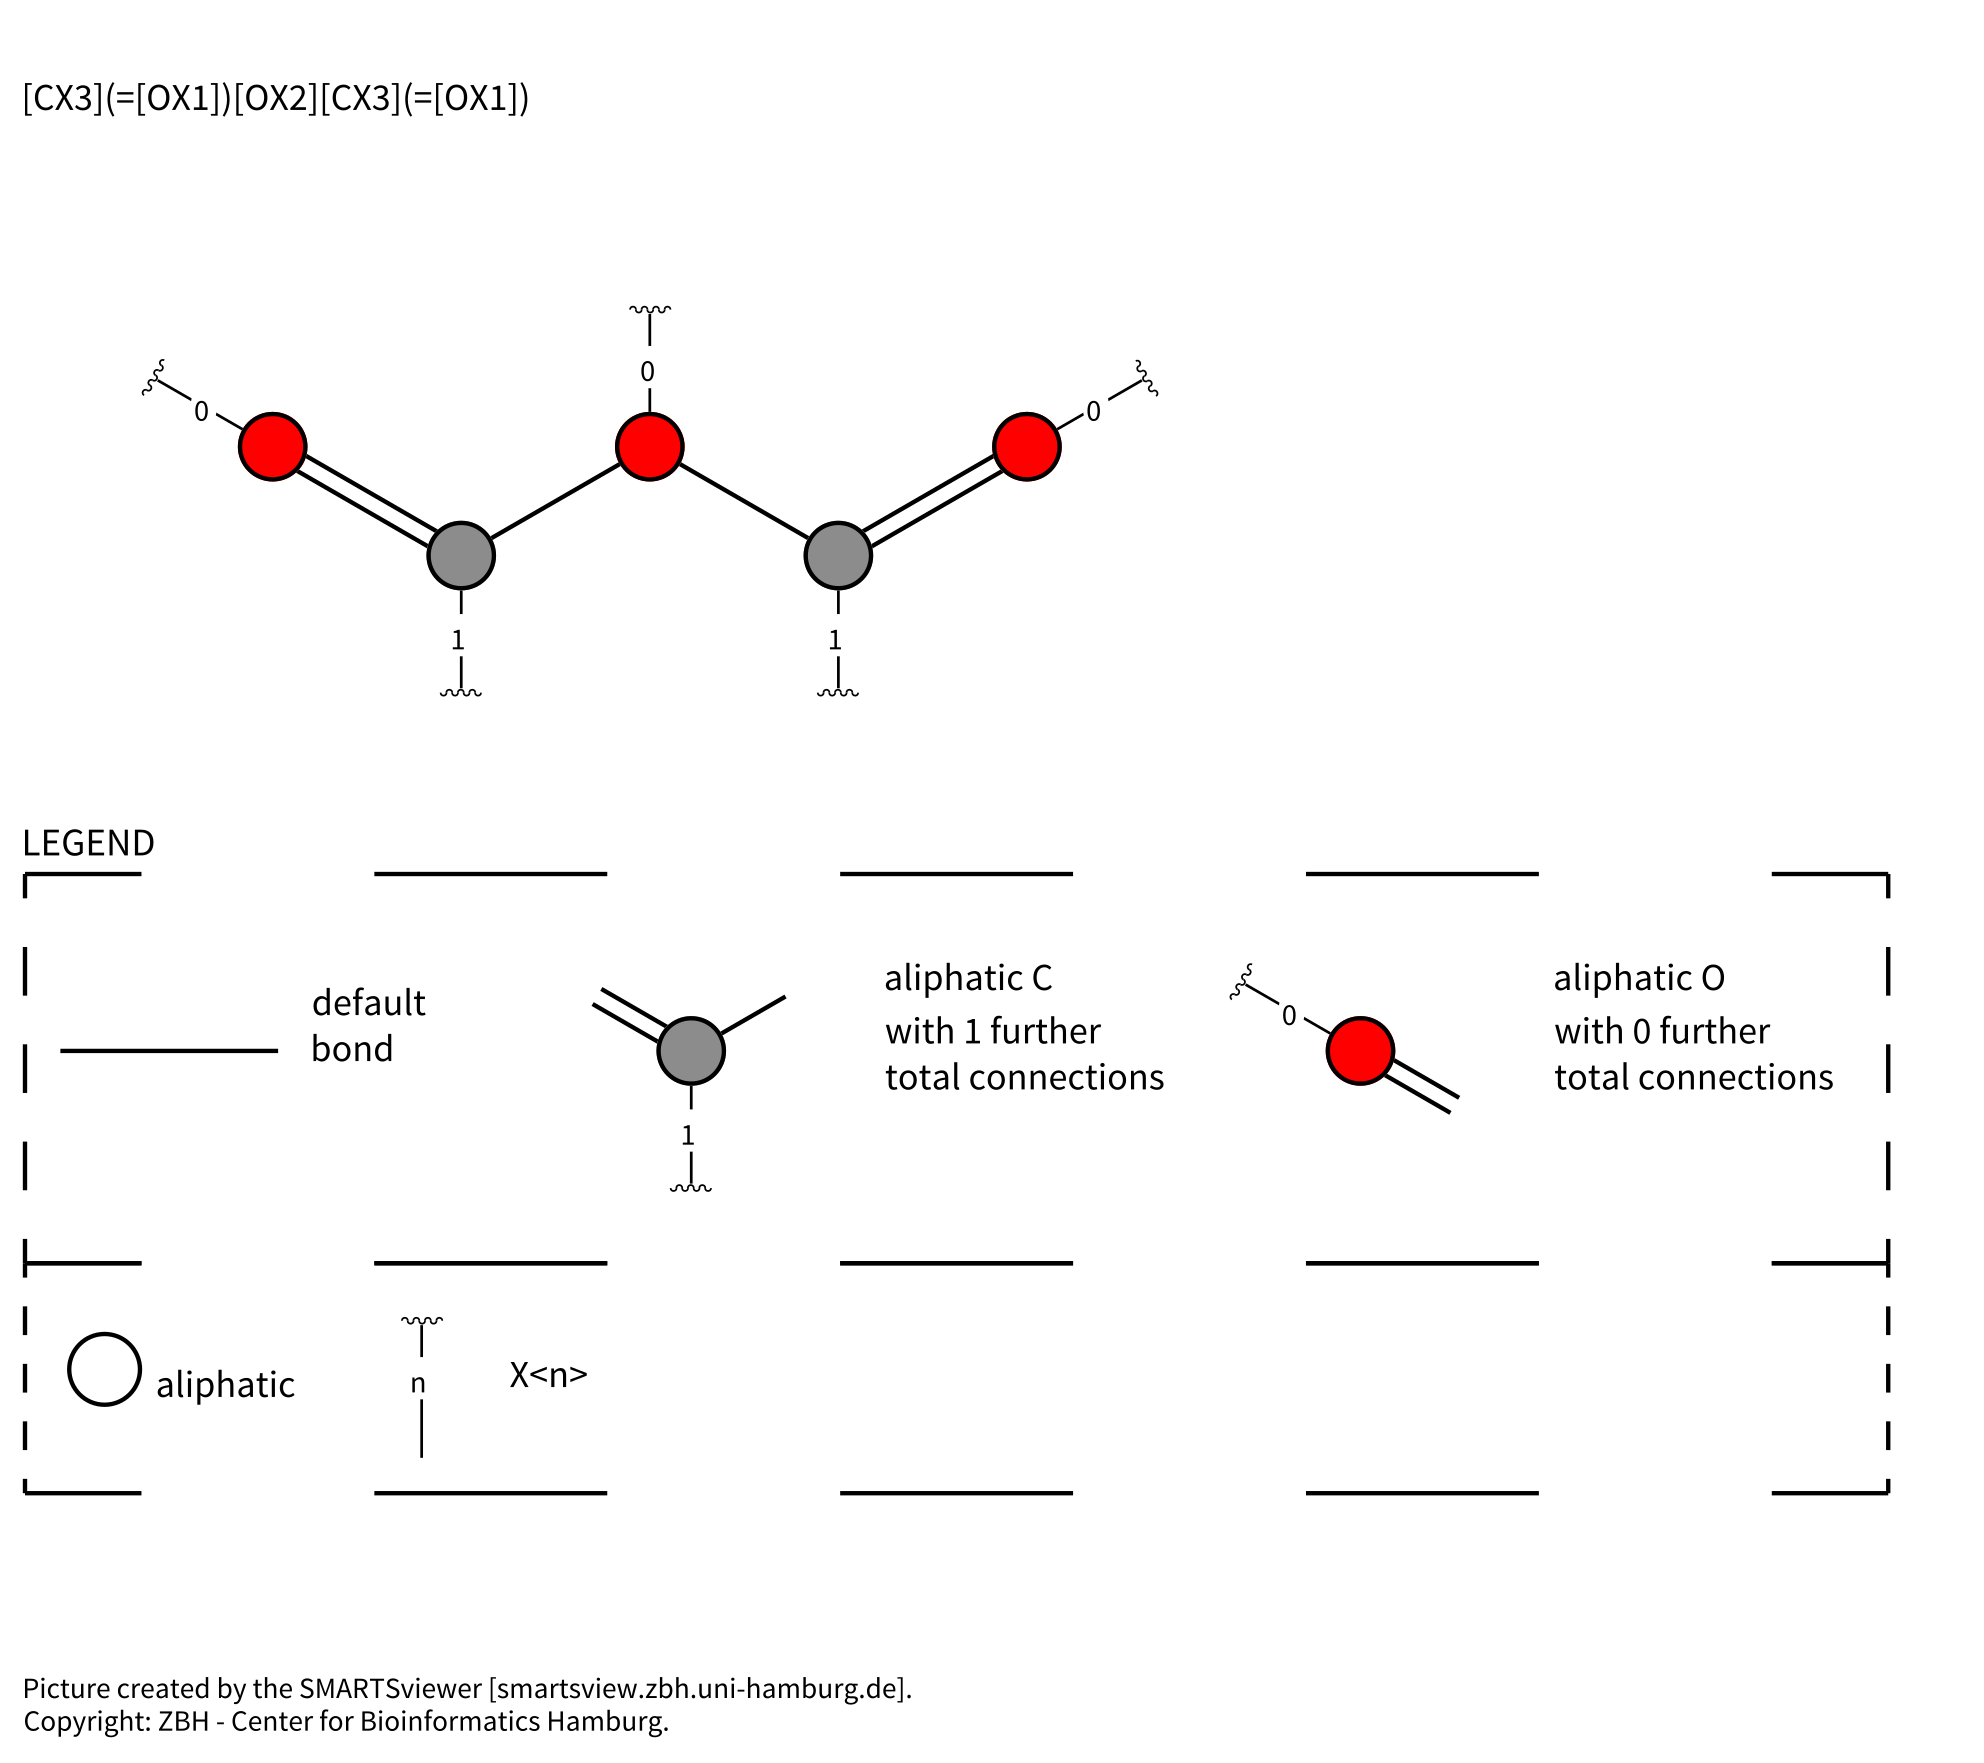

In [33]:
im1 = get_img("smarts=[CX3](=[OX1])[OX2][CX3](=[OX1])")
im1